C:\Users\Edvan\AppData\Local\Temp\ipykernel_8972\755861795.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tri['DT_INI_EXERC'] = pd.to_datetime(df_tri['DT_INI_EXERC'])
C:\Users\Edvan\AppData\Local\Temp\ipykernel_8972\755861795.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tri['DT_FIM_EXERC'] = pd.to_datetime(df_tri['DT_FIM_EXERC'])
C:\Users\Edvan\AppData\Local\Temp\ipykernel_8972\755861795.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

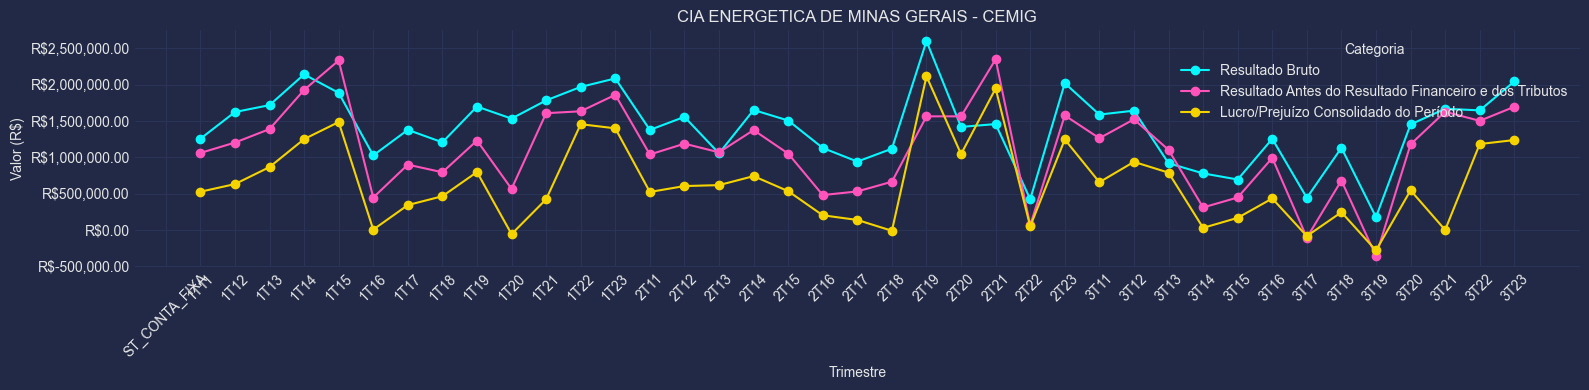

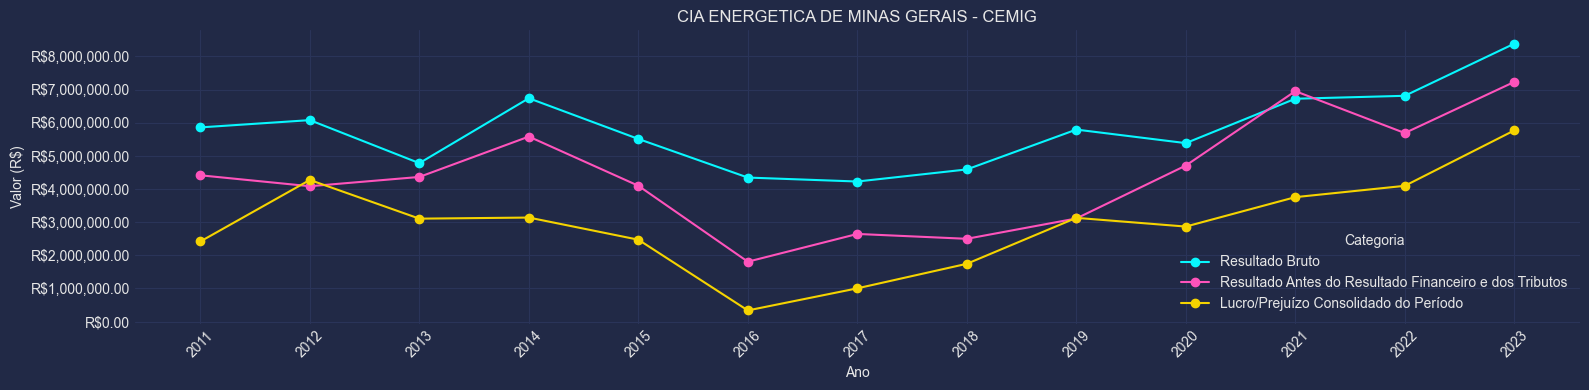

In [108]:
import sqlite3
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')
empresa = 'CIA ENERGETICA DE MINAS GERAIS - CEMIG'
def formatar_moeda(valor, pos):
    return f'R${valor:,.2f}'
def quarter_mapping(date):
    quarter = (date.month - 1) // 3 + 1
    return f'{quarter}T{str(date.year)[2:]}'
def year_mapping(date):
    return date.year
def show_values(x):
    if len(x) > 1:
        return x.iloc[0]
    else:
        return x.iloc[0]
try:
    banco_dados = sqlite3.connect('DADOS_CVM.db')
    tabela_trimestral = "SELECT * FROM DRE_CONSOLIDADO"
    tabela_anual = "SELECT * FROM DFP_DRE_CONSOLIDADO"
    df_trimestral = pd.read_sql(tabela_trimestral, banco_dados)
    df_anual = pd.read_sql(tabela_anual, banco_dados)
finally:
    banco_dados.close()
df_trimestral_selecao = df_trimestral[df_trimestral['DENOM_CIA'] == empresa]
df_anual_selecao = df_anual[df_anual['DENOM_CIA'] == empresa]
df_coluna=['ST_CONTA_FIXA','DS_CONTA','VL_CONTA','DT_INI_EXERC','DT_FIM_EXERC']
df_tri=df_trimestral_selecao[df_coluna]
df_anual=df_anual_selecao[df_coluna]
df_tri['DT_INI_EXERC'] = pd.to_datetime(df_tri['DT_INI_EXERC'])
df_tri['DT_FIM_EXERC'] = pd.to_datetime(df_tri['DT_FIM_EXERC'])
df_tri['Trimestre'] = df_tri['DT_INI_EXERC'].apply(quarter_mapping)
pivot_table = pd.pivot_table(df_tri, values='VL_CONTA', index=['ST_CONTA_FIXA','DS_CONTA'], columns='Trimestre', aggfunc=show_values)
df_pivot_tri = pivot_table.reset_index()
df_anual['DT_INI_EXERC'] = pd.to_datetime(df_anual['DT_INI_EXERC'])
df_anual['DT_FIM_EXERC'] = pd.to_datetime(df_anual['DT_FIM_EXERC'])
df_anual['Ano'] = df_anual['DT_INI_EXERC'].apply(year_mapping)
pivot_table = pd.pivot_table(df_anual, values='VL_CONTA', index=['DS_CONTA', 'ST_CONTA_FIXA'], columns='Ano', aggfunc=show_values)
df_pivot_anual = pivot_table.reset_index()
categorias = ['Resultado Bruto', 'Resultado Antes do Resultado Financeiro e dos Tributos', 'Lucro/Prejuízo Consolidado do Período']
df_filtrado = df_pivot_tri[df_pivot_tri['DS_CONTA'].isin(categorias)]
df_filtrado = df_filtrado.set_index('DS_CONTA').T
df_filtrado = df_filtrado.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(16, 4))
for categoria in categorias:
    plt.plot(df_filtrado.index, df_filtrado[categoria], marker='o', label=categoria)
plt.title(f'{empresa}')
plt.xlabel('Trimestre')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.legend(title='Categoria')
plt.grid(True)
formatter = FuncFormatter(formatar_moeda)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()
df_filtrado = df_pivot_anual[df_pivot_anual['DS_CONTA'].isin(categorias)]
df_filtrado = df_filtrado.set_index('DS_CONTA').T
df_filtrado.index = df_filtrado.index.astype(str)
df_filtrado = df_filtrado.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(16, 4))
for categoria in categorias:
    plt.plot(df_filtrado.index, df_filtrado[categoria], marker='o', label=categoria)
plt.title(f'{empresa}')
plt.xlabel('Ano')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.legend(title='Categoria')
plt.grid(True)
formatter = FuncFormatter(formatar_moeda)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()
